# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

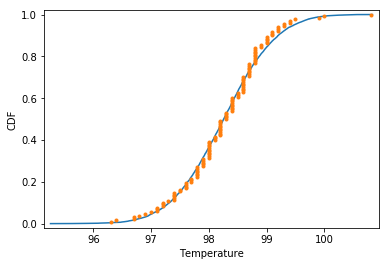

In [2]:
# 1. Is the distribution of body temperatures normal?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

df = pd.read_csv('data/human_body_temperature.csv')
#compute ecdf
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x, y

sigma = np.std(df['temperature'])  
mu = np.mean(df['temperature'])
samples=np.random.normal(mu, sigma, size=10000)

x_theor, y_theor = ecdf(samples)
x, y=ecdf(df['temperature'])

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')

plt.show()

#Conclusion: The theoretical CDF and the ECDF of the data suggest that the temperatures are, indeed, Normally distributed. 
#This also suggests that in the last 120 years or so, there have not been major evolutions,climate changes, or other factors 
#that have significantly affected the normal human body temperatures.

In [5]:
#2. Is the sample size large? Are the observations independent?
#Ans: the sample size has 130 entries, which is larger than 30, so is considered large. The observation is independent
# because each entry is a single individual with his or her gender, and heart rate.

In [42]:
#3. Is the true population mean really 98.6 degrees F?
# First, try a bootstrap hypothesis test
 # hyphothesis #1: the true population mean is 98.6.
  # Write a function to generate many bootstrap replicated from the data set
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates


bs_replicates=draw_bs_reps(df.temperature, np.mean, size=10000)

#p1=np.sum(bs_replicates >= 98.6)/10000
#p1
# p=0 means that we should reject the hypothesis that the true population is 98.6.
# one-sample test is applied because we only have one sample in this case.
# in this situation, it is appropriate to use the z statictics because the sample size is greater than 30.


# if the test statistics is np.mean(df.temperature)=98.2
# hypothesis #2: the true population mean is 98.25
mu=np.mean(df.temperature)
mu
p2=np.sum(bs_replicates >= mu)/10000
# p=0.4917 means that we should not reject the hypothesis because the true mean population is 98.25.

0.4917

In [62]:
#5 Draw a small sample of size 10 from the data and repeat both frequentist tests.
import numpy as np
import scipy.stats as st
import scipy.special as sp
n=10
z=(98.6-mu)/(sigma/np.sqrt(10))
z
#pval_z=2*(1-st.norm.cdf(z))
#pval_z=1-pval_z
#pval_z
#t_sample=np.random.choice(df.temperature, size=10)
#t_sample
#t=scipy.stats.ttest_1samp(t_sample,mu)
#t


1.5187483920537046

In [61]:
t_sample=np.random.choice(df.temperature, size=10)
t=scipy.stats.ttest_1samp(t_sample,mu)
t


Ttest_1sampResult(statistic=0.0809737282870168, pvalue=0.9372349361267579)

In [ ]:
Now try using the other test. How is the result be different? Why

In [4]:
sigma = np.std(df['temperature'])
sigma

0.7303577789050377